# Homework 2 (100 Points)

The goal of this homework is to get more practice with pandas and get practice with clustering on various datasets.



## Exercise 1 - (50 points)

This exercise will be using the [Airbnb dataset](http://insideairbnb.com/get-the-data.html) for NYC called `listings.csv`. You can download it directly [here](http://data.insideairbnb.com/united-states/ny/new-york-city/2021-11-02/visualisations/listings.csv)

a) Produce a Heatmap using the Folium package (you can install it using pip) of the mean listing price per location (lattitude and longitude) over the NYC map. (5 points)

Hints:
1. generate a base map of NYC to plot over: default_location=[40.693943, -73.985880] 
2. generate an HTML file named `index.html` - open it in your browser and you'll see the heatmap 



In [174]:
import pandas as pd
import folium
from folium import plugins
from folium.plugins import HeatMap
import plotly.express as px
import matplotlib
from matplotlib import pyplot as plt

df = pd.read_csv('/Users/preshitadave/Downloads/listings.csv')

#base map of nyc
base_map = folium.Map(location=[40.693943, -73.985880],zoom_start = 11)


heat_data = df.groupby(["latitude","longitude"])['price'].mean().reset_index().values.tolist()

                           
HeatMap(heat_data).add_to(base_map)
                       
# Display the map
base_map.save(outfile= "index_a.html")


/Users/preshitadave/opt/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


b) Normalize the price by subtracting the mean and dividing by the standard deviation. Then reproduce the heatmap from a). Comment on any differences you observe. - (5 points )



In [175]:
heat_data_df=df.groupby(["latitude","longitude"])['price'].mean().to_frame(name = 'price').reset_index()
mean = heat_data_df['price'].mean()
std = heat_data_df['price'].std()
heat_data_df['normalized_price']=((heat_data_df['price']-mean))/std

base_map = folium.Map(location=[40.693943, -73.985880],zoom_start = 11)

# plotting the normalized price heatmap
heat_data = heat_data_df[['latitude', 'longitude', 'normalized_price']].values.tolist()
HeatMap(heat_data).add_to(base_map)

# Display the map
base_map.save(outfile= "index_b.html")


Due to normalisation, the heatmap in Part (b) has much more defined borders and colors in areas on the map as compared to the heatmap in Part (a). It highlights some areas which weren't highlighted in (a), for instance, around the Rockaway Community Park. 

c) Normalize the original price using sklearn's [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to the interval [0,1]. Then reproduce the Heatmap from a). Comment on any differences you observe.  - (5 points)



In [177]:
from sklearn.preprocessing import MinMaxScaler


heat_data_df=df.groupby(["latitude","longitude"])['price'].mean().to_frame(name = 'price').reset_index()

x = heat_data_df['price'].values.reshape(-1, 1) #returns a numpy array
min_max_scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = min_max_scaler.fit_transform(x)
heat_data_df['normalized_sklearn'] = x_scaled

base_map = folium.Map(location=[40.693943, -73.985880],zoom_start = 11)

heat_data = heat_data_df[['latitude', 'longitude', 'normalized_sklearn']].values.tolist()
HeatMap(heat_data).add_to(base_map)

# Display the map
base_map.save(outfile= "index_c.html")


This heatmap is similar compared to the heat map in (b). But one can observe that some of the areas are colored in red in (c) which are highlighted yellow in (b). This normalization method is probably more sensitive than the one in (b). 

d) Plot a bar chart of the average price (un-normalized) per room type. Briefly comment on the relation between price and room type. - (2.5 points)


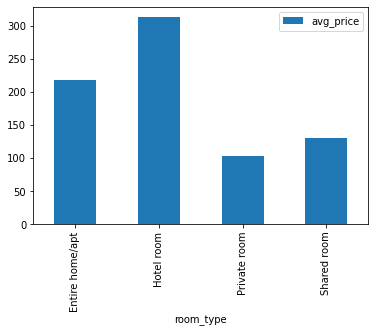

In [178]:
room=df.groupby(["room_type"])['price'].mean().to_frame(name = 'avg_price').reset_index()
room_df = room[['room_type','avg_price']]

room_df.plot(x="room_type", y="avg_price", kind="bar");

Hotel room has a higher average price than the rest of the room types, hence it's probably more expensive than the rest on an average. 

e) Plot on the NYC map the top 10 most expensive listings - (2.5 points)

In [179]:
heat_data_df=df.groupby(["latitude","longitude"])['price'].mean().to_frame(name = 'price').reset_index()
df_expensive = heat_data_df.sort_values(by=['price'], ascending=False)
top_10=df_expensive[0:10]

base_map = folium.Map(location=[40.693943, -73.985880],zoom_start = 11)

for row in top_10.iterrows():
    folium.Marker([row[1]['latitude'], row[1]['longitude']], popup='Expensive', icon=folium.Icon(color='green')).add_to(base_map)
    
base_map.save(outfile= "expensive.html")

f) Plot on the NYC map the top 10 most reviewed listings - (2.5 points)


In [180]:
df_reviewed = df.sort_values(by=['number_of_reviews'], ascending=False)
top_10=df_reviewed[0:10]

for row in top_10.iterrows():
    folium.Marker([row[1]['latitude'], row[1]['longitude']], popup='Highly reviewed', icon=folium.Icon(color='purple')).add_to(base_map)
    
base_map.save(outfile= "reviews.html")

g) Plot on the NYC map the top 10 most available listings - (2.5 points)

In [181]:
df_available = df.sort_values(by=['availability_365'], ascending=False)
top_10=df_available[0:10]

for row in top_10.iterrows():
    folium.Marker([row[1]['latitude'], row[1]['longitude']], popup='Highly available', icon=folium.Icon(color='blue')).add_to(base_map)
    
base_map.save(outfile= "available.html")

h) Using `longitude`, `latitude`, `price`, and `number_of_reviews`, use Kmeans to create 5 clusters. Plot the points on the NYC map in a color corresponding to their cluster. - (5 points)


In [182]:
import numpy as np
from sklearn.cluster import KMeans

reviews_df = df[['latitude', 'longitude', 'number_of_reviews','price']]
reviews_df


kmeans = KMeans(n_clusters=5, random_state=0).fit(np.array(reviews_df))

labels = kmeans.labels_

# np.savetxt('clusterlabels', labels)

colormap = ['red', 'green', 'blue', 'black', 'purple']

base_map = folium.Map(location=[40.693943, -73.985880],zoom_start = 11) 

for index, row in reviews_df.iterrows():
    folium.vector_layers.Circle(location = (row['latitude'], row['longitude']), radius = 0.1, color = colormap[labels[index]] ).add_to(base_map)
    
    
base_map.save(outfile= "clustering.html")

i) You should see points in the same cluster all over the map - briefly explain why that is. - (2.5 points)

In the map generated above, we can see that most of the points are clustered in the same color (red). This is most probably due to the fact that the clustering algorithm clustered all of them together in one cluster cause the features to be clustered are very similar to each other - latitude, longitude, price and number of reviews (the features that we used for clustering). 

j) How many clusters would you recommend using instead of 5? Display and interpret either the silhouette scores or the elbow method. - (5 points)

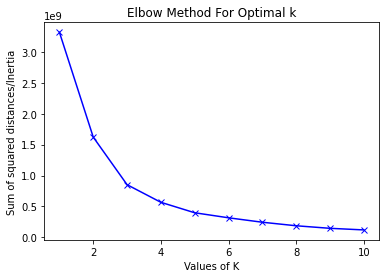

In [195]:
# Elbow method
Sum_of_squared_distances = []
K = range(1,11)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(reviews_df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

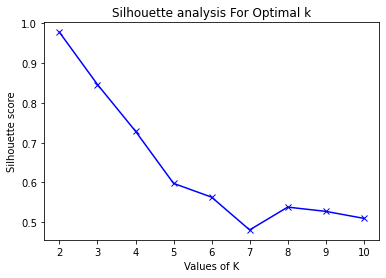

In [203]:
# Silhouette score method
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
silhouette_avg = []
for num_clusters in range_n_clusters:
 
     # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(reviews_df)
    cluster_labels = kmeans.labels_

     # silhouette score
    silhouette_avg.append(silhouette_score(reviews_df, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

The elbow method suggests 3 clusters. The silhouette score method suggests 2 clusters. The clusters I would recommend would be 2-3 based on these methods.

k) Would you recommend normalizing the price and number of reviews? Briefly explain why. - (2.5 points)

Yes, I would recommend normalizing the price and number of reviews. We saw the effect of normalizing the price in part b and c. Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks. Ref - https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

l) For all listings of type `Shared room`, plot the dendrogram of the hierarchical clustering generated from `longitude`, `latitude`, and `price`. - (5 points)


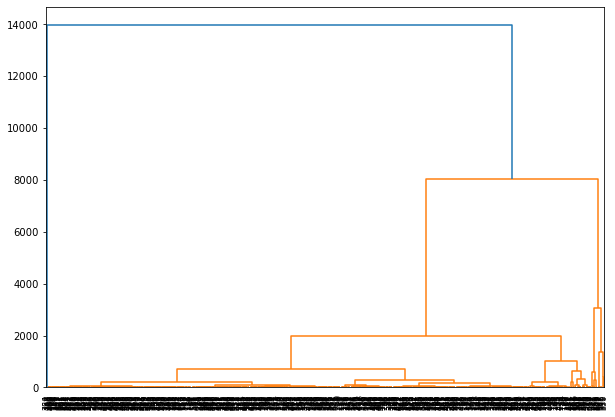

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage

df_shared = df[(df['room_type'] == 'Shared room')]
df_shared = df_shared[['latitude', 'longitude', 'price']]

# Calculate the distance between each sample
Z = linkage(df_shared, 'ward')

labelList = range(1, len(df_shared)+1)

plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=labelList)
plt.show()

m) briefly comment on what you observe from the structure of the dendrogram.  - (2.5 points)

The y-axis value (distance between the clusters/points) for the big cluster (blue) is very high - 14000. The clustering of the datapoints isn't seen that clearly as it is in the hierarchial clustering performed with the normalized dataset shown below. 
To select the number of clusters that one should use, once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters. Basically the horizontal line is a threshold, which defines the minimum distance required to be a separate cluster. 
Ref: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

n) Normalize the `price` as in b) and repeat l) - (2.5 points)

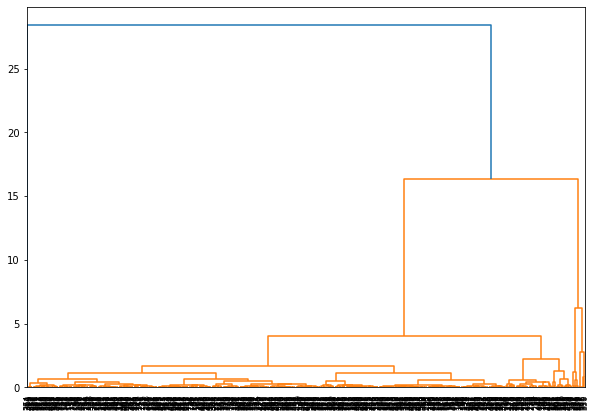

In [58]:
mean = df_shared['price'].mean()
std = df_shared['price'].std()
df_shared['normalized_price']=((df_shared['price']-mean))/std

# plotting the normalized price heatmap
df_shared_normalized = df_shared[['latitude', 'longitude', 'normalized_price']].values.tolist()


# Calculate the distance between each sample
Z = linkage(df_shared_normalized, 'ward')

labelList = range(1, len(df_shared_normalized)+1)

plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=labelList)
plt.show()


Normalization of the data and then performing the hierarchial clustering greatly reduces the y-axis value maximum. This is because before normalization one takes the actual value but after normalization, the value reduces as the data is scaled. One can also see better clustering at the lower y-axis values near zero which couldn't be observed before in the un-normalized hierarchial clustering. 

## Exercise 2 (50 points)

This exercise will be using the [mnist dataset](http://yann.lecun.com/exdb/mnist/).

a) Using Kmeans, cluster the images using 10 clusters and plot the centroid of each cluster. - (10 points)

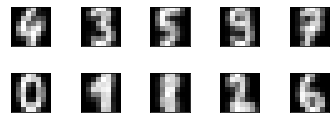

In [204]:
from IPython.core.pylabtools import figsize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

mnist = load_digits()

origlabel = mnist.target

# your code here
data = mnist.data
kmeans = KMeans(n_clusters=10, random_state=0).fit(data)
label = kmeans.labels_

np.savetxt('origlabel',origlabel)
np.savetxt('label',label)


centroid = kmeans.cluster_centers_

rows = 2
cols = 5
axes=[]
fig=plt.figure(figsize = (cols,rows))

for i in range(rows*cols):
    ax = fig.add_subplot(rows, cols, i+1)
    axes.append(ax)
    plt.imshow(centroid[i,:].reshape(8,8),cmap='gray')
fig.tight_layout()    
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.show()

b) what is the disagreement distance between the clustering you created above and the clustering created by the labels attached to each image? Briefly explain what this number means in this context. - (10 points)

In [205]:
total = len(data)
dist = 0


for i in range(0, total-1):
  for j in range(i+1, total):
    if(origlabel[i] == origlabel[j]):
      if(label[i] != label[j]):
        dist = dist+1 
    elif(origlabel[i] != origlabel[j]):
      if (label[i] == label[j]):
        dist = dist+1


print(dist)
print(round(dist*100/ (total*total-1)/2,2),'% are misclassified')

98043
1.52 % are misclassified


c) Download the CIFAR-10 dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html). Open `batch_1` by following the documentation on the web page. Plot a random image from the dataset. - (10 points)

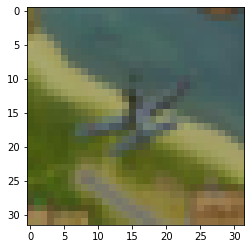

In [206]:
import numpy as np
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


cifar = unpickle('/Users/preshitadave/Downloads/cifar-10-batches-py/data_batch_1')

X = cifar[b'data']

X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
X.shape

# Visualizing CIFAR 10
fig, axes1 = plt.subplots(figsize=(4,4))

index = np.random.choice(range(len(X)))

img = X[index]
axes1.imshow(X[index])

d) This image is 32 x 32 pixels and each pixel is a 3-dimensional object of RGB (Red, Green, Blue) intensities. Using the same image as in c), produce an image that only uses 4 colors (the 4 centroids of the clusters obtained by clustering the image itself using Kmeans). - (10 points)

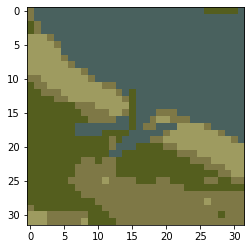

In [207]:
from sklearn.cluster import KMeans
img_init = img.copy() # save a copy of initial image, will modify this 

kmeans = KMeans(n_clusters=4, random_state=0).fit(img_init.reshape(1024, 3))

centroid = kmeans.cluster_centers_
labels = kmeans.labels_

new = np.int32(centroid[labels])

fig = plt.figure(figsize = (4,4))

plt.imshow(new.reshape(32,32,3))

e) Write a function that applies this transformation to the entire dataset for any number K of colors. - (10 points)

In [208]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


def single_image(k, img, l, w):
    # maintaining a copy of the image 
    img_init = img.copy()
    
    # assuming image is a 3 channel image, asking user to specify length l and width w of image 
    # assuming user gives input of image as (# of samples, product of image dimensions)
    # for instance, cifar is (10000, 3072) => 3072 = 3 * 32 * 32 
    
    #performing kmeans
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_init.reshape(l*w, 3))
    
    centroid = kmeans.cluster_centers_
    labels = kmeans.labels_

    new = np.int32(centroid[labels])
    single = new.reshape(l,w,3)

    return single
    
    
def transformation(k, dataset, l, w):
    result = np.array([])
    for i in dataset:
        result = np.append(result, np.array([[single_image(k,i,l,w)]]))
        
    return result.reshape(-1, len(dataset))


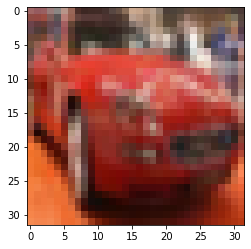

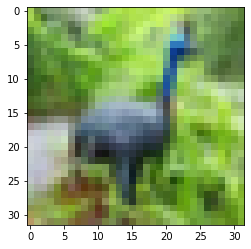

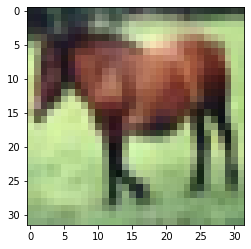

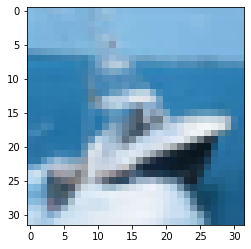

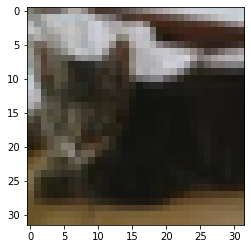

In [209]:
### testing the function written above with a dataset


# loading in dataset 
cifar = unpickle('/Users/preshitadave/Downloads/cifar-10-batches-py/data_batch_1')
X = cifar[b'data']
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
# selecting a subset of the data 
dataset = X[5:10]
result = transformation(4, dataset, 32, 32)


# to plot the dataset images after transformation 
for i in dataset:
    fig = plt.figure(figsize = (4,4))
    plt.imshow(i.reshape(32,32,3))
    